# XGBoost

# Team members:
* Technical writer - **Abylay Aitbanov**
* Author of executable content - **Alisher Aip**
* Project Manager - **Adilzhan Jumakanov**

# Book about XGBoost
<a href="https://drive.google.com/file/d/1Lf8lbV5OiFa-EiJWToSIyjHOx9oBe0Hg/view?usp=sharing"> Read here </a>
<br>
<img src="assets/img_1.png" alt="Description of the image" width="300" height="400">

# Introduction

![](assets/img_3.png)

[XGBoost](https://github.com/dmlc/xgboost) is one of the most popular and efficient implementations of the Gradient Boosted Trees algorithm, a supervised learning method that is based on function approximation by optimizing specific loss functions as well as applying several regularization techniques. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. 

XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

#### Objective Function in XGBoost

The objective function in XGBoost is designed to be minimized during the training process. For a regression problem, it is commonly defined as follows:

$$
\text{Objective} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$

Here's a breakdown of the components:


$$ \sum_{i=1}^{n} L(y_i, \hat{y}_i) $$
   - This term represents the sum of the loss function over all data points.
   - \(n\) is the number of data points.
   - $ L(y_i, \hat{y}_i) $ is the loss incurred for predicting $ \hat{y}_i $ when the true label is $ y_i $.

  
$$ \sum_{k=1}^{K} \Omega(f_k) $$
   - This term represents the sum of the regularization terms over all the trees in the ensemble.
   - $ K $ is the number of trees.
   - $ f_k $ - a function (in our case a tree) that we want to train at the step
   - $ \Omega(f_k) $ is the regularization term for the $ k $-th tree.

   
For a regression problem, a common choice for the loss function is the mean squared error (MSE), which is given by:

$$
L(y_i, \hat{y}_i) = (y_i - \hat{y}_i)^2
$$


The regularization term $ \Omega(f_k) $ typically consists of two parts:


$$
\Omega(f_k) = \gamma T + \frac{1}{2}\lambda \sum_{j=1}^{T} w_{j}^2
$$

Here:
- $ T $ is the number of leaves in the tree.
- $ w_j $ is the score assigned to the \(j\)-th leaf.
- $ \gamma\ $ and $ \lambda\ $ are regularization parameters.

The entire objective function is designed to balance the model's fit to the training data (captured by the loss function) with a penalty for complexity (captured by the regularization term). It ensures that the model generalizes well to unseen data while avoiding overfitting.

#### Description of the algorithm

<br>

![](assets/img_2.png)

XGBoost is based on the gradient boosting algorithm for decision trees. Gradient boosting is a machine learning technique for classification and regression problems that builds a prediction model in the form of an ensemble of weak predictive models, usually decision trees. Ensemble training is carried out sequentially, in contrast to, for example, bagging. 

At each iteration, the deviations of the predictions of the already trained ensemble on the training set are calculated. The next model that will be added to the ensemble will predict these deviations. Thus, by adding the predictions of the new tree to the predictions of the trained ensemble, we can reduce the average deviation of the model, which is the target of the optimization problem. New trees are added to the ensemble until the error decreases or until one of the "early stopping" rules is satisfied.

#### CPU vs GPU

<br>

![](assets/img.png)

CPU-powered machine learning tasks with XGBoost can literally take hours to run. That’s because creating highly accurate, state-of-the-art prediction results involves the creation of thousands of decision trees and the testing of large numbers of parameter combinations. Graphics processing units, or GPUs, with their massively parallel architecture consisting of thousands of small efficient cores, can launch thousands of parallel threads simultaneously to supercharge compute-intensive tasks.



# XGBOOST Features

### Algorithm Enhancements

1. Tree [Pruning](https://www.displayr.com/machine-learning-pruning-decision-trees/) is a method employed in machine learning to decrease the size of regression trees. This is achieved by replacing nodes that do not contribute to enhancing classification on the leaves. The primary objective of pruning a regression tree is to prevent overfitting of the training data. The most effective approach for pruning is the Cost Complexity or Weakest Link Pruning, which utilizes mean square error, k-fold cross-validation, and learning rate internally. In the case of XGBoost, the algorithm generates nodes (or splits) up to a specified max_depth and initiates pruning from the end, progressing backward until the loss falls below a defined threshold. To decide whether to remove a split, XGBoost considers the cumulative loss by computing the total loss (-3 + 7 = +4) and retains both the split and subsequent node if the result is positive.

2. Sparsity-Aware Split Discovery is a technique frequently employed when dealing with data that exhibits sparsity, characterized by a significant presence of missing or empty values. This sparsity may arise either inherently in the collected data or result from data engineering processes such as feature encoding. To account for sparsity patterns in the data, each tree is assigned a default direction. XGBoost addresses missing data by assigning them to the default direction and determining the optimal imputation value that minimizes the training loss. The optimization strategy involves selectively visiting only the missing values, resulting in a significant acceleration of the algorithm—up to 50 times faster than the naive method.


### System Enhancements

1. Parallelization is a crucial aspect of tree learning, where data needs to be organized in a sorted manner. To mitigate the expenses associated with sorting, the data is partitioned into compressed blocks, each containing a column with its corresponding feature values. XGBoost enhances efficiency by concurrently sorting each block using all the available cores/threads of the CPU. This optimization is particularly beneficial because a substantial number of nodes are regularly generated in the process of building a tree. In essence, XGBoost achieves parallelization by distributing the workload of sequentially generating trees across multiple cores or threads.
2. Through cache-aware optimization, gradient statistics (both direction and value) for each split node are stored in an internal buffer specific to each thread. The accumulation of these statistics is done in a mini-batch manner, effectively minimizing the time overhead associated with immediate read/write operations and preventing cache misses. The optimization strategy is rooted in achieving cache awareness, and this is facilitated by selecting an optimal block size, typically around 2¹⁶. In summary, the cache-aware approach enhances efficiency by strategically managing and utilizing cache resources, resulting in improved performance for the algorithm.


### Flexibility in XGBoost

1. A customized objective function in machine learning serves the purpose of either maximizing or minimizing a specific criterion. In the context of machine learning, the goal is typically to minimize the objective function, which is a composite of the loss function and a regularization term. The objective function encapsulates the measure of how well the model performs, incorporating both the accuracy in predicting outcomes (loss function) and any regularization constraints imposed to prevent overfitting or enhance generalization. Customization of the objective function allows practitioners to tailor the optimization process according to the specific goals and characteristics of their machine learning task.

<br>

![](assets/img_4.png)

 - Optimizing the loss function encourages predictive models whereas optimizing regularization leads to smaller variance and makes prediction stable. Different objective functions available in XGBoost are:

    * reg: linear for regression
    * reg: logistic, and binary: logistic for binary classification
    * multi: softmax, and multi: softprob for multiclass classification
 
 - Customized Evaluation Metric — This is a metric used to monitor the model’s accuracy on validation data.
    ● rmse — Root mean squared error (Regression)
    ● mae — Mean absolute error (Regression)
    ● error — Binary classification error (Classification)
    ● logloss — Negative log-likelihood (Classification)
    ● auc — Area under the curve (Classification)

# Implementation of Extreme Gradient Boosting 

The below code loads the dataset from the web. Here, we will use a classification problem predicting the click-through Rate. The purpose of click-through rate (CTR) prediction is to predict how likely a person will click on an advertisement or item

Import the required libraries

In [242]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Load the dataset from the web

In [243]:
url="https://raw.githubusercontent.com/ataislucky/Data-Science/main/dataset/ad_ctr.csv"
ad_data = pd.read_csv(url)

In [244]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [245]:
#check the missing value
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [246]:
#check the distribution of the target variable
ad_data['Clicked on Ad'].value_counts(normalize=True)

Clicked on Ad
0    0.5083
1    0.4917
Name: proportion, dtype: float64

Bar plot to visualize the target variable

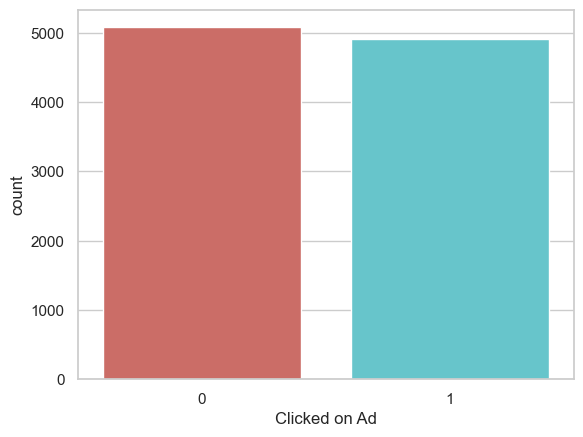

In [247]:
sns.countplot(x='Clicked on Ad',data=ad_data, palette='hls')
plt.show()

Time spent on the internet and clicks per hour plot

Text(0.5, 1.0, 'Number of clicks by hour')

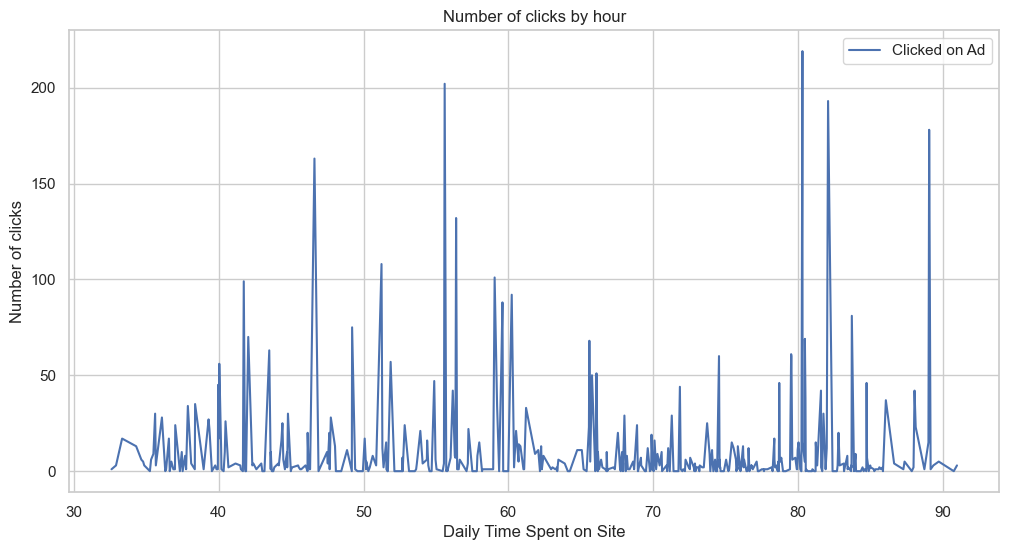

In [248]:
ad_data.groupby('Daily Time Spent on Site').agg({'Clicked on Ad':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour')

Boxplot to visualize the distribution of the feature and colour coded to understand the target variable

In [249]:
def hue_boxplot(feature):
    """
    Create a Plotly box plot with optional color-coding.

    Parameters:
        - feature

    Returns:
        - fig: A Plotly figure.
    """
    fig = px.box(ad_data, 
             x=feature,  
             color="Clicked on Ad", 
             title=f"{feature} on Daily Internet Usage", 
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
    fig.update_traces(quartilemethod="exclusive")

    return fig.show()

In [250]:
hue_boxplot('Age')

In [251]:
hue_boxplot('Daily Time Spent on Site')

In [252]:
hue_boxplot('Area Income')

### Data Preparation and Analysis

In [253]:
ad_data['Gender'].value_counts(normalize=True)

Gender
Female    0.5376
Male      0.4624
Name: proportion, dtype: float64

Categorical columns need to be converted into numerical columns before feeding into the model.

In [254]:
gender_mapping = {'Male': 0, 'Female': 1}
ad_data['Gender'] = ad_data['Gender'].map(gender_mapping)
ad_data['Gender'].value_counts(normalize=True)

Gender
1    0.5376
0    0.4624
Name: proportion, dtype: float64

In [255]:
# Use Label Encoding to convert the country column
ad_data['Country'] = ad_data['Country'].astype('category').cat.codes
ad_data['Country'].value_counts()[:10]

Country
9      388
44     330
187    312
149    224
81     221
14     190
27     176
2      174
200    162
20     162
Name: count, dtype: int64

In [256]:
ad_data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,0,174,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,0,166,2016-01-16 17:56:05,0


Dropping few unnecessary columns before model training

In [257]:
ad_data.drop(['Ad Topic Line', 'City', 'Timestamp'], axis=1, inplace=True)

In [258]:
#creating two dataset X and y : features dataset and target dataset
X = ad_data.loc[:, ad_data.columns != 'Clicked on Ad']
y = ad_data['Clicked on Ad']
X.shape, y.shape

((10000, 6), (10000,))

Randomly split training set into train and test subsets

In [259]:
#split the dataset into train test 80:20 portion
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 6), (2000, 6), (8000,), (2000,))

### Model Training Build XGBoost Model and Make Predictions

It is imperative to divide our dataset into two distinct sets: the training set, which is used to train our model, and the testing set, which serves to evaluate how effectively our model fits the dataset.

Once the split is done we move to train the base model, here we are using the default parameter for training the model to show its effectiveness.

In [260]:
# Create and train the base XGBoost model with the default parameters
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Once trained we will use the model to predict the test data set and evaluate its performance on the test data set.

In [261]:
# Make predictions on the train dataset iteself
y_pred_train = model.predict(X_train)

The below code evaluates the model performance.

In [262]:
#function to create the model evaluation metric
def model_eval(y_actual, y_predicted):
    
    """pass the actual and predicted data"""
    
    print('Accuracy:',accuracy_score(y_actual, y_predicted))
    print(classification_report(y_actual, y_predicted))
    cm = confusion_matrix(y_actual, y_predicted)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, linewidths=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    return plt.show()    

Accuracy: 0.947
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4065
           1       0.95      0.94      0.95      3935

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000


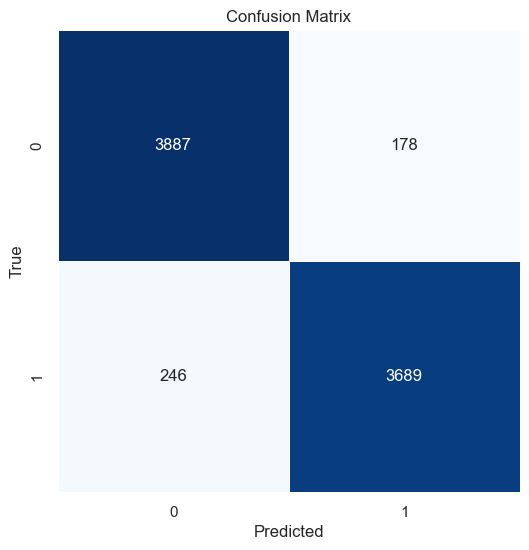

In [263]:
model_eval(y_train, y_pred_train)

Accuracy: 0.8345
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1018
           1       0.85      0.81      0.83       982

    accuracy                           0.83      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000


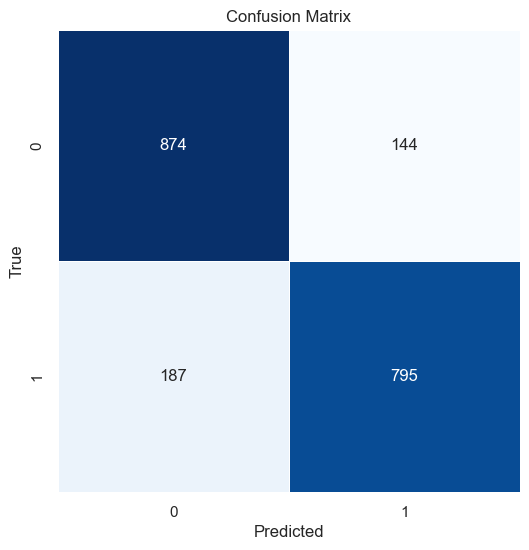

In [264]:
# Make predictions in the test
y_pred_test = model.predict(X_test)
model_eval(y_test, y_pred_test)

### SHAP Explainer

SHAP (SHapley Additive exPlanations) is a game theoretic approach to understand each player's contribution to the final outcome. This in turn explains the output of any ML model. ML models, especially ensembles, are considered black box models as they are difficult to interpret. It is harder to determine which are the important predictors for the model.

The code below, creates an explainer object by providing a XGBoost classification model, then calculates SHAP value using a testing set.

In [265]:
#create the explainer to plot the shap plots 
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

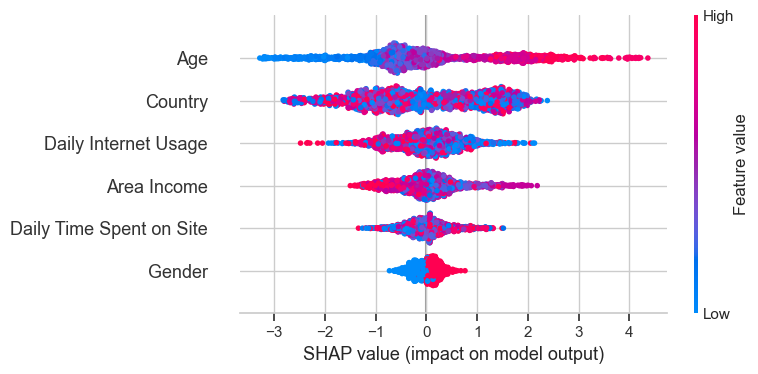

In [266]:
#shap summary plot
shap.summary_plot(shap_values, X_test)

* The Y-axis represents the feature names arranged in descending order of importance, with the most important features at the top and the least important ones at the bottom
* The X-axis denotes the SHAP value, which serves as a measure of the extent of change in log odds
* If we examine the "Age" feature and observe a notably positive value, it indicates that Age exerts a substantial positive influence on the output. In other words, when a person's age is higher, there is a heightened probability that the individual will be more inclined to click on the advertisement. Next, If we look at the feature “Daily Internet usage," we notice that it is mostly high with a negative SHAP value. It means high internet usage tends to negatively affect the output.

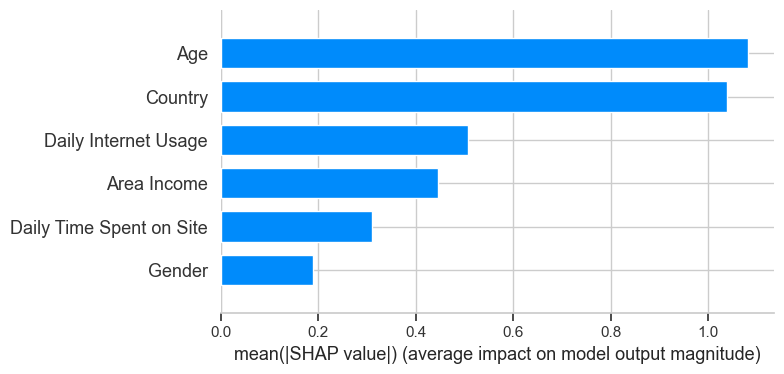

In [267]:
# Plot summary_plot as barplot
shap.summary_plot(shap_values, X_test, plot_type='bar')

The summary plot shows the feature importance of each feature in the model. The results show that “Age,” “Country,” and “Daily Internet Usage” play major roles as predictors.

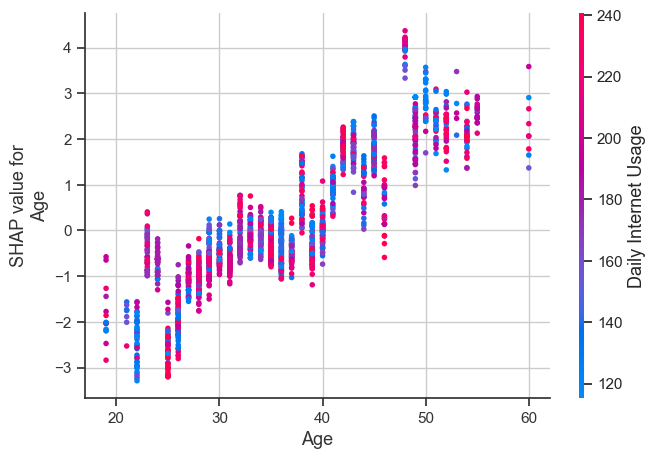

In [268]:
# Plot dependence_plot
shap.dependence_plot("Age", shap_values, X_test)

* Each dot is a single prediction from the dataset, the x-axis is the value of age,
* The y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction. For this model the units are log-odds of clicking the ad.
* For example, a 60 year old with high internet usage is more likely to click on the ad. 


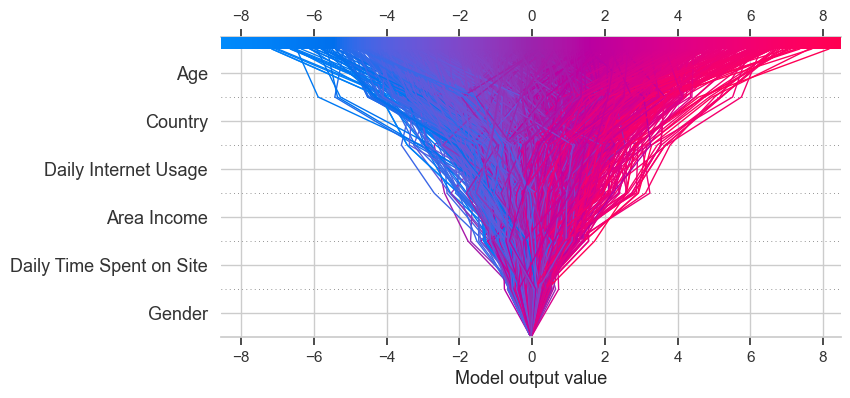

In [269]:
# Plot decision_plot
expected_value = explainer.expected_value
shap.decision_plot(expected_value, shap_values, X_test)

Every line depicted on the decision plot illustrates the level of influence of individual features on a specific model prediction, thereby elucidating which feature values had the most impact on that prediction.

### Hyperparameter tuning and finding the best parameter

Hyperparameter tuning in XGBoost is a crucial step to optimize the performance of your model. Here are the key steps and considerations for XGBoost hyperparameter tuning:

To find the best parameter we will use GridSearchCV and Randomized search CV. The below code is used to train the model and find the best parameters.

In [ ]:
#Initialise model using best parameters
model = XGBClassifier(objective="binary:logistic",subsample=1,
colsample_bytree=0.5,
min_child_weight=5,
max_depth=12,
learning_rate=0.1,
n_estimators=100)
#Fit the model but stop early if there has been no reduction in error after 10 epochs.
model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

Use the model to predict the target variable on the unseen dat

Accuracy: 0.918875
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4065
           1       0.92      0.92      0.92      3935

    accuracy                           0.92      8000
   macro avg       0.92      0.92      0.92      8000
weighted avg       0.92      0.92      0.92      8000


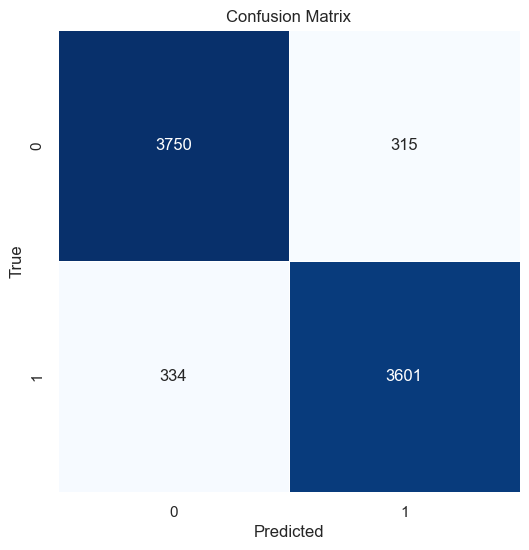

In [293]:
train_predictions = model.predict(X_train)
model_eval(y_train, train_predictions)

Accuracy: 0.842
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1018
           1       0.85      0.82      0.84       982

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000


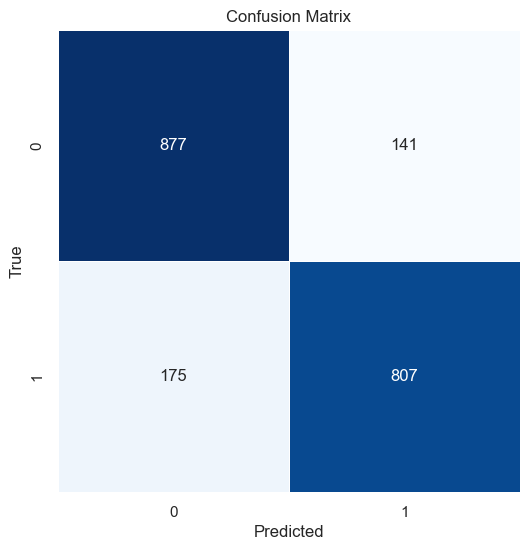

In [294]:
predictions = model.predict(X_test)
model_eval(y_test, predictions)

Next, we will again pass the parameters and this time we will also add the regularization parameter.

In [295]:
#here along with the other parameter passing the regularization to balance the bias and variance
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'reg_alpha' : [0.1,0.001,.00001],
              'reg_lambda': [0.1,0.001,.00001]
              
          
              }

Instantiate the model, with 100 estimators.

In [296]:
xgbclf = XGBClassifier(n_estimators=100, n_jobs=-1)

We use RandomizedCV to find the best parameter

In [297]:
#we use randomized cv to obtaine the best params
clf = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)


Fit the model, find the best parameter and use it to predict the target variable.

In [298]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                   n_iter=25, n_jobs=4,
                   param_distributions={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.4],
                                        'max_depth': [3, 6, 10, 15],
                                        'n_estimators': [100, 250, 500, 750],
                                        'reg_alpha': [0.1, 0.001, 1e-05],
                                        'reg_lambda': [0.1, 0.001, 1e-05],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='accuracy', verbose=1)

In [299]:
print("Best hyperparameter combination: ", clf.best_params_)

Best hyperparameter combination:  {'subsample': 0.7999999999999999, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.4, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.8999999999999999}
